Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


C:\Users\Farrel\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


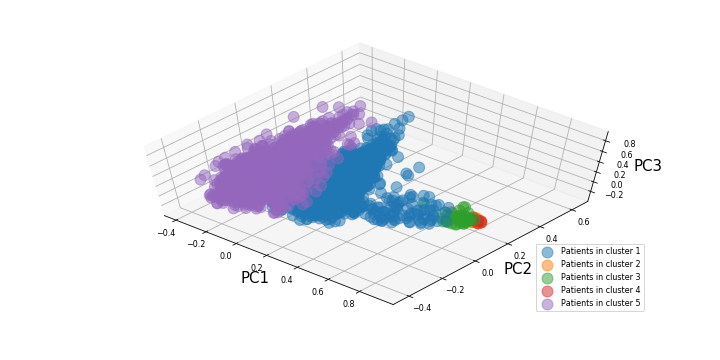

In [7]:
%matplotlib inline  
%matplotlib notebook
%pylab
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (10, 5)
pylab.rcParams['font.size'] = 8

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

feature_dataset = pd.read_csv('Features.csv')
X_train = feature_dataset.iloc[:, 0:37].values
X = feature_dataset.iloc[:, 0:37].values

from sklearn.cluster import KMeans

num_cluster = 5

fig = plt.figure()

kmeans = KMeans(n_clusters = num_cluster, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)
centroids = kmeans.fit(X_train).cluster_centers_
labels = kmeans.fit(X_train).labels_

from sklearn.preprocessing import normalize
X_train = normalize(X_train)

from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
explain_variance = pca.explained_variance_ratio_

bx = fig.add_subplot(111, projection= '3d')
n = num_cluster 

c0 = X_train[np.where(labels == 0)]
c1 = X_train[np.where(labels == 1)]
c2 = X_train[np.where(labels == 2)]
c3 = X_train[np.where(labels == 3)]
c4 = X_train[np.where(labels == 4)]

bx.scatter(c0[:, 0], c0[:, 1], c0[:, 2], s=120, alpha = 0.5, label='Patients in cluster 1')
bx.scatter(c1[:, 0], c1[:, 1], c1[:, 2], s=120, alpha = 0.5, label='Patients in cluster 2')
bx.scatter(c2[:, 0], c2[:, 1], c2[:, 2], s=120, alpha = 0.5, label='Patients in cluster 3')
bx.scatter(c3[:, 0], c3[:, 1], c3[:, 2], s=120, alpha = 0.5, label='Patients in cluster 4')
bx.scatter(c4[:, 0], c4[:, 1], c4[:, 2], s=120, alpha = 0.5, label='Patients in cluster 5')
    
f = 15
bx.set_xlabel('PC1', fontsize = f)
bx.set_ylabel('PC2', fontsize = f)
bx.set_zlabel('PC3', fontsize = f)

bx.legend(loc='lower right')
